In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-01-09 15:43:16--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2023-01-09 15:43:16 (7.03 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
import pandas as pd

df=pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
               parse_dates=["Date"],
               index_col=['Date'])

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
bitcoin_prices= pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})

Text(0.5, 1.0, 'Price of Bitcoin')

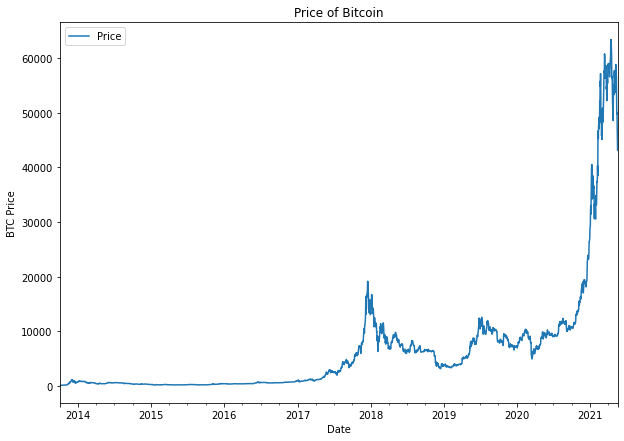

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin")


In [ ]:
import csv 
from datetime import datetime

timesteps=[]
btc_price=[]
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r")as f:
  csv_reader= csv.reader(f,delimiter=',')
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
    btc_price.append(float(line[2]))

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 1.0, 'Price of Bitcoin')

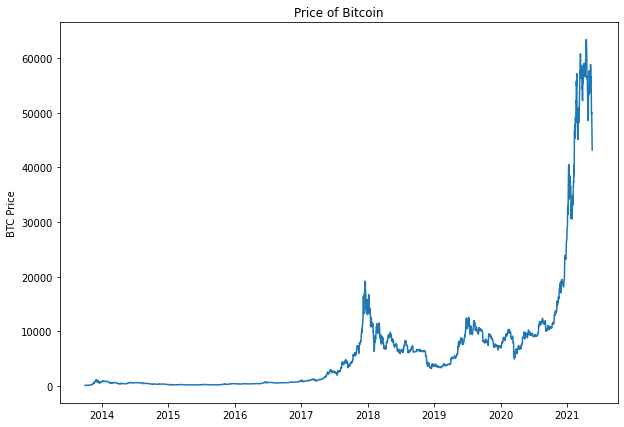

In [ ]:
import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps,btc_price)
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin")

In [ ]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

In [ ]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

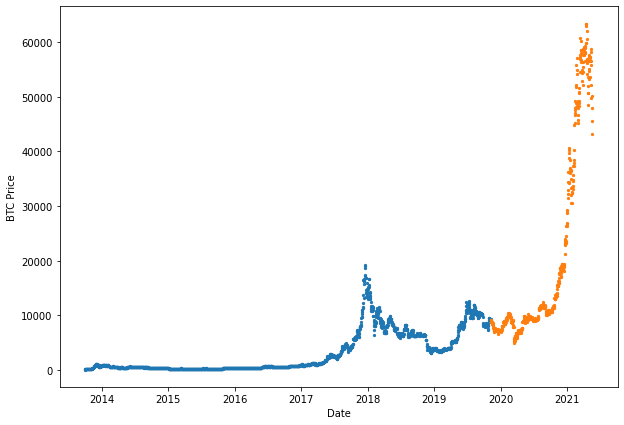

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")

plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.show()

In [ ]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)
     

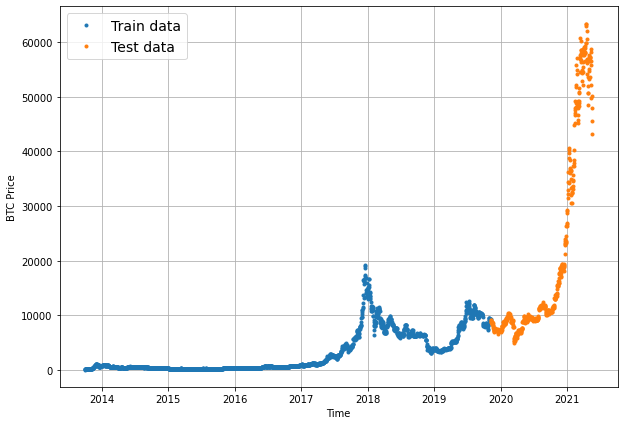

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [ ]:
naive_forecast= y_test[:-1]
naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

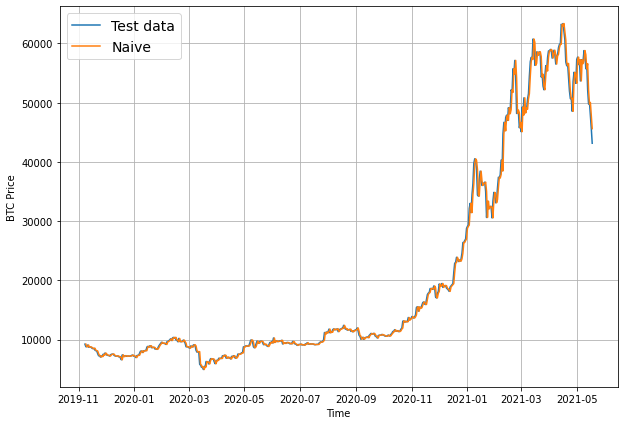

In [ ]:
plt.figure(figsize=(10, 7))
#plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test,format="-", label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast,format="-", label="Naive")

In [ ]:
import tensorflow as tf

In [ ]:
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [ ]:
naive_forecast

array([ 9226.48582088,  8794.35864452,  8798.04205463,  9081.18687849,
        8711.53433917,  8760.89271814,  8749.52059102,  8656.97092235,
        8500.64355816,  8469.2608989 ,  8537.33965197,  8205.80636599,
        8118.4885358 ,  8074.84317361,  7612.7405735 ,  7262.11053495,
        7303.40575852,  7041.73293642,  7211.86180875,  7141.06944869,
        7523.4806726 ,  7390.20746923,  7729.26593894,  7542.23560864,
        7381.96300782,  7333.43293049,  7315.36776456,  7213.73376172,
        7398.78704961,  7511.88058312,  7532.12351309,  7550.23919987,
        7333.09604316,  7239.76257544,  7198.06667705,  7190.27236926,
        7238.87432299,  7087.02498535,  7112.73147612,  6883.49639377,
        6584.02884335,  7424.01540023,  7147.56832379,  7139.93337053,
        7286.33508116,  7236.98620461,  7166.17237853,  7235.6266505 ,
        7212.80939522,  7183.70653603,  7227.29371168,  7311.56064392,
        7385.46484791,  7251.27679432,  7179.95781929,  7174.74401195,
      

In [ ]:
mean_absolute_scaled_error(y_true= y_test[1:], y_pred=naive_forecast)

<tf.Tensor: shape=(), dtype=float64, numpy=0.9995699939182624>

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  # y_true = tf.cast(y_true, dtype=tf.float32)
  # y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  if mae.ndim>0:
    mae=tf.reduce_mean(mae)
    mse=tf.reduce_mean(mse)
    rmse=tf.reduce_mean(rmse)
    mape=tf.reduce_mean(mape)
    mase=tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802273457541,
 'mse': 1147547.1250238959,
 'rmse': 1071.2362601330744,
 'mape': 2.516524929982267,
 'mase': 0.9995699939182624}

In [ ]:
HORIZON= 1
WINDOW_SIZE= 7

In [ ]:
def get_labelled_windows(x, horizon=HORIZON):
  return x[:,:-horizon], x[:,-horizon:]


In [ ]:
import numpy as np
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  window_step=np.expand_dims(np.arange(window_size+horizon),axis=0)
  window_indexes= window_step + np.expand_dims(np.arange(len(x)- (window_size+horizon-1)),axis=0).T
  #print(window_step, np.expand_dims(np.arange(len(x)- (window_size+horizon-1)),axis=0).T)
  windowed_array= x[window_indexes]
  #print(windowed_array)

  windows, labels= get_labelled_windows(windowed_array, horizon)
  #print(windows,labels)
  return windows, labels

full_windows, full_labels= make_windows(prices)
len(full_windows), len(full_labels)


(2780, 2780)

In [ ]:
for i in range(3):
  print(full_windows[i],full_labels[i])

[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] [123.033]
[125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] [124.049]
[108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] [125.96116]


In [ ]:
def make_train_test_splits(windows, labels, test_split=0.2):
  splits_size= int(len(windows)*(1-test_split))
  train_windows= windows[:split_size]
  train_labels=labels[:split_size]
  test_windows= windows[split_size:]
  test_labels= labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)


(2229, 551, 2229, 551)

In [ ]:
train_windows

array([[ 123.65499   ,  125.455     ,  108.58483   , ...,  121.33866   ,
         120.65533   ,  121.795     ],
       [ 125.455     ,  108.58483   ,  118.67466   , ...,  120.65533   ,
         121.795     ,  123.033     ],
       [ 108.58483   ,  118.67466   ,  121.33866   , ...,  121.795     ,
         123.033     ,  124.049     ],
       ...,
       [9369.62808116, 9326.59962378, 9335.75240233, ..., 8794.35864452,
        8798.04205463, 9081.18687849],
       [9326.59962378, 9335.75240233, 9226.48582088, ..., 8798.04205463,
        9081.18687849, 8711.53433917],
       [9335.75240233, 9226.48582088, 8794.35864452, ..., 9081.18687849,
        8711.53433917, 8760.89271814]])

In [ ]:
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),
                                            monitor="val_loss",
                                            verbose=0,
                                            save_best_only=True)
  



In [ ]:
from tensorflow.keras import layers

tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) 

Epoch 1/100
18/18 [==============================] - 5s 94ms/step - loss: 770.8699 - mae: 770.8699 - val_loss: 2211.9968 - val_mae: 2211.9968
Epoch 2/100
18/18 [==============================] - 1s 66ms/step - loss: 231.9996 - mae: 231.9996 - val_loss: 1010.5925 - val_mae: 1010.5925
Epoch 3/100
18/18 [==============================] - 1s 49ms/step - loss: 176.6515 - mae: 176.6515 - val_loss: 936.3781 - val_mae: 936.3781
Epoch 4/100
18/18 [==============================] - 1s 56ms/step - loss: 163.9299 - mae: 163.9299 - val_loss: 914.9297 - val_mae: 914.9297
Epoch 5/100
18/18 [==============================] - 0s 12ms/step - loss: 158.4962 - mae: 158.4962 - val_loss: 916.9711 - val_mae: 916.9711
Epoch 6/100
18/18 [==============================] - 1s 56ms/step - loss: 152.1268 - mae: 152.1268 - val_loss: 824.4700 - val_mae: 824.4700
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 151.1029 - mae: 151.1029 - val_loss: 843.7176 - val_mae: 843.7176
Epoch 8/100
18/18

In [ ]:
naive_results

{'mae': 567.9802273457541,
 'mse': 1147547.1250238959,
 'rmse': 1071.2362601330744,
 'mape': 2.516524929982267,
 'mase': 0.9995699939182624}

In [ ]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 602.2151 - mae: 602.2151


[602.215087890625, 602.215087890625]

In [ ]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 570.3397 - mae: 570.3397


[570.3397216796875, 570.3397216796875]

In [ ]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions



In [ ]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(551, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8753.917 , 8694.883 , 8529.391 , 8478.01  , 8532.248 , 8275.484 ,
        8132.8237, 8078.055 , 7702.991 , 7311.736 ], dtype=float32)>)

In [ ]:
#layer = tf.keras.layers.experimental.preprocessing.Normalization(dtype='float32')
model_1_preds= np.float64(model_1_preds)

In [ ]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 570.3397368514985,
 'mse': 1180294.7576910225,
 'rmse': 1086.4137138728609,
 'mape': 2.539222681957394,
 'mase': 0.9954422787613826}

In [ ]:
naive_results

{'mae': 567.9802273457541,
 'mse': 1147547.1250238959,
 'rmse': 1071.2362601330744,
 'mape': 2.516524929982267,
 'mase': 0.9995699939182624}

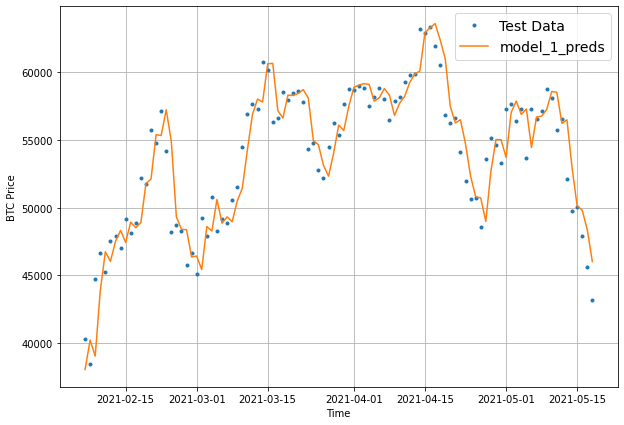

In [ ]:
offset= 450
plt.figure(figsize=(10,7))
plot_time_series(timesteps= X_test[-len(test_windows):], values=test_labels[:,0], start=offset, label='Test Data')

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format='-',
                 label="model_1_preds")

In [ ]:
HORIZON=1
WINDOW_SIZE=30

In [ ]:
full_windows, full_labels=make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [ ]:
model_2=tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name='model_2_dense')

model_2.compile(loss='mae',
                optimizer= tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [ ]:
model_2.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 2ms/step - loss: 801.5410


801.5409545898438

In [ ]:
model_2=tf.keras.models.load_model('/content/model_experiments/model_2_dense')
model_2.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 2ms/step - loss: 615.4113


615.4112548828125

In [ ]:
model_2_preds= make_preds(model_2,
                         input_data=test_windows)
model_2_preds= np.float64(model_2_preds)

17/17 [==============================] - 0s 1ms/step


In [ ]:
model_2_results= evaluate_preds(y_true=tf.squeeze(test_labels),
                                y_pred=model_2_preds)
model_2_results

{'mae': 615.4112902614273,
 'mse': 1259358.6024202718,
 'rmse': 1122.2114784746555,
 'mape': 2.735659888797798,
 'mase': 1.0416310482067357}

In [ ]:
HORIZON=7
WINDOW_SIZE=30

full_windows, full_labels=make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

model_3=tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name='model_3_dense')

model_3.compile(loss='mae',
                optimizer= tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

model_3.evaluate(test_windows, test_labels)

model_3=tf.keras.models.load_model('/content/model_experiments/model_3_dense')
model_3.evaluate(test_windows, test_labels)

model_3_preds= make_preds(model_3,
                         input_data=test_windows)
model_3_preds= np.float64(model_3_preds)

model_3_results= evaluate_preds(y_true=tf.squeeze(test_labels),
                                y_pred=model_3_preds)

17/17 [==============================] - 0s 1ms/step


In [ ]:
model_3_results

{'mae': 1280.6247972973574,
 'mse': 5551059.890625789,
 'rmse': 1471.5048174107078,
 'mape': 5.53060016417983,
 'mase': 2.189603377723658}

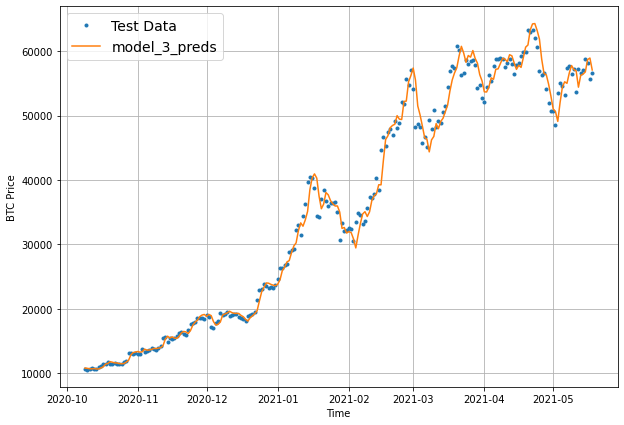

In [ ]:
offset= 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps= X_test[-len(test_windows):], values=test_labels[:,0], start=offset, label='Test Data')

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 start=offset,
                 format='-',
                 label="model_3_preds")

##CONV1D

In [ ]:
HORIZON=1
WINDOW_SIZE=7

full_windows, full_labels=make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)


In [ ]:
x=tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layer=layers.Lambda(lambda x: tf.expand_dims(x,axis=1))
expand_dims_layer(x)

<tf.Tensor: shape=(7, 1), dtype=float32, numpy=
array([[123.65499],
       [125.455  ],
       [108.58483],
       [118.67466],
       [121.33866],
       [120.65533],
       [121.795  ]], dtype=float32)>

In [ ]:
model_4= tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=7, padding='causal', activation='relu'),
    layers.Dense(HORIZON)
],name='model_4_conv1D')

model_4.compile(loss='mae',
                optimizer= tf.keras.optimizers.Adam())

model_4.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

# model_4.evaluate(test_windows, test_labels)

# model_4=tf.keras.models.load_model('/content/model_experiments/model_4_dense')
# model_4.evaluate(test_windows, test_labels)

# model_4_preds= make_preds(model_4,
#                          input_data=test_windows)
# model_4_preds= np.float64(model_4_preds)

# model_4_results= evaluate_preds(y_true=tf.squeeze(test_labels),
#                                 y_pred=model_4_preds)

Epoch 1/100
16/18 [=========================>....] - ETA: 0s - loss: 1807.6541  

18/18 [==============================] - 6s 53ms/step - loss: 1709.9159 - val_loss: 2025.3469
Epoch 2/100
15/18 [========================>.....] - ETA: 0s - loss: 334.6709

18/18 [==============================] - 1s 35ms/step - loss: 315.9241 - val_loss: 1297.6536
Epoch 3/100
17/18 [===========================>..] - ETA: 0s - loss: 211.9921

18/18 [==============================] - 1s 36ms/step - loss: 211.4451 - val_loss: 1032.3693
Epoch 4/100
17/18 [===========================>..] - ETA: 0s - loss: 185.2318

18/18 [==============================] - 1s 47ms/step - loss: 184.0401 - val_loss: 1021.2042
Epoch 5/100
18/18 [==============================] - ETA: 0s - loss: 181.7460

18/18 [==============================] - 1s 36ms/step - loss: 181.7460 - val_loss: 1017.3105
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 167.6826

18/18 [==============================] - 1s 36ms/step - loss: 178.9352 - val_loss: 999.2738
Epoch 7/100
18/18 [==============================] - 0s 6ms/step - loss: 177.7513 - val_loss: 1014.3784
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - loss: 175.0372 - val_loss: 1030.3815
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 172.6550 - val_loss: 1031.8378
Epoch 10/100
 1/18 [>.............................] - ETA: 0s - loss: 183.1079

18/18 [==============================] - 1s 35ms/step - loss: 171.2732 - val_loss: 981.2731
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 177.6694

18/18 [==============================] - 1s 34ms/step - loss: 170.9696 - val_loss: 940.0818
Epoch 12/100
18/18 [==============================] - 0s 4ms/step - loss: 167.0302 - val_loss: 948.3654
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 164.8428 - val_loss: 981.2242
Epoch 14/100
18/18 [==============================] - 0s 4ms/step - loss: 161.3029 - val_loss: 947.8026
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 163.7229

18/18 [==============================] - 1s 35ms/step - loss: 159.8014 - val_loss: 889.0036
Epoch 16/100
18/18 [==============================] - 0s 4ms/step - loss: 158.6838 - val_loss: 891.8866
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 113.6621

18/18 [==============================] - 1s 35ms/step - loss: 154.5005 - val_loss: 862.3442
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 155.8322 - val_loss: 908.5937
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 157.3739

18/18 [==============================] - 1s 34ms/step - loss: 150.9702 - val_loss: 854.7197
Epoch 20/100
16/18 [=========================>....] - ETA: 0s - loss: 150.6538

18/18 [==============================] - 1s 36ms/step - loss: 148.8913 - val_loss: 835.4121
Epoch 21/100
17/18 [===========================>..] - ETA: 0s - loss: 146.8653

18/18 [==============================] - 1s 35ms/step - loss: 146.0799 - val_loss: 817.7830
Epoch 22/100
18/18 [==============================] - 0s 5ms/step - loss: 144.8034 - val_loss: 839.4532
Epoch 23/100
18/18 [==============================] - ETA: 0s - loss: 144.0222

18/18 [==============================] - 1s 36ms/step - loss: 144.0222 - val_loss: 804.3682
Epoch 24/100
18/18 [==============================] - 0s 5ms/step - loss: 140.7303 - val_loss: 864.7546
Epoch 25/100
 1/18 [>.............................] - ETA: 0s - loss: 184.3213

18/18 [==============================] - 1s 50ms/step - loss: 143.5492 - val_loss: 769.6600
Epoch 26/100
18/18 [==============================] - 0s 4ms/step - loss: 138.8716 - val_loss: 775.2209
Epoch 27/100
18/18 [==============================] - 0s 5ms/step - loss: 138.5890 - val_loss: 821.2039
Epoch 28/100
18/18 [==============================] - 0s 4ms/step - loss: 139.0040 - val_loss: 805.5110
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 135.1740

18/18 [==============================] - 1s 36ms/step - loss: 137.5688 - val_loss: 752.4979
Epoch 30/100
18/18 [==============================] - ETA: 0s - loss: 132.0010

18/18 [==============================] - 1s 35ms/step - loss: 132.0010 - val_loss: 733.4736
Epoch 31/100
 1/18 [>.............................] - ETA: 0s - loss: 171.9415

18/18 [==============================] - 1s 35ms/step - loss: 132.1982 - val_loss: 720.7664
Epoch 32/100
18/18 [==============================] - 0s 5ms/step - loss: 136.5804 - val_loss: 834.8616
Epoch 33/100
 1/18 [>.............................] - ETA: 0s - loss: 138.5121

18/18 [==============================] - 1s 35ms/step - loss: 133.3819 - val_loss: 707.3161
Epoch 34/100
 1/18 [>.............................] - ETA: 0s - loss: 118.4177

18/18 [==============================] - 1s 34ms/step - loss: 130.5436 - val_loss: 703.2680
Epoch 35/100
16/18 [=========================>....] - ETA: 0s - loss: 134.1160

18/18 [==============================] - 1s 36ms/step - loss: 133.5234 - val_loss: 700.1602
Epoch 36/100
18/18 [==============================] - 0s 5ms/step - loss: 130.8267 - val_loss: 714.1470
Epoch 37/100
18/18 [==============================] - ETA: 0s - loss: 125.5101

18/18 [==============================] - 1s 36ms/step - loss: 125.5101 - val_loss: 693.4266
Epoch 38/100
18/18 [==============================] - 0s 6ms/step - loss: 126.5870 - val_loss: 716.5154
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 116.1880

18/18 [==============================] - 1s 34ms/step - loss: 124.1582 - val_loss: 675.3204
Epoch 40/100
13/18 [====================>.........] - ETA: 0s - loss: 120.3793

18/18 [==============================] - 1s 36ms/step - loss: 123.5204 - val_loss: 674.8033
Epoch 41/100
17/18 [===========================>..] - ETA: 0s - loss: 121.9795

18/18 [==============================] - 1s 35ms/step - loss: 121.8683 - val_loss: 663.0812
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 123.5209 - val_loss: 693.7076
Epoch 43/100
 1/18 [>.............................] - ETA: 0s - loss: 124.7629

18/18 [==============================] - 1s 34ms/step - loss: 127.6027 - val_loss: 654.8680
Epoch 44/100
18/18 [==============================] - 0s 4ms/step - loss: 121.7135 - val_loss: 666.3636
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 119.6918 - val_loss: 658.4150
Epoch 46/100
17/18 [===========================>..] - ETA: 0s - loss: 119.5377

18/18 [==============================] - 1s 50ms/step - loss: 119.1336 - val_loss: 646.1046
Epoch 47/100
 1/18 [>.............................] - ETA: 0s - loss: 112.7014

18/18 [==============================] - 1s 35ms/step - loss: 119.8993 - val_loss: 644.7499
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 119.4201 - val_loss: 671.9128
Epoch 49/100
18/18 [==============================] - 0s 4ms/step - loss: 118.0655 - val_loss: 649.9350
Epoch 50/100
 1/18 [>.............................] - ETA: 0s - loss: 142.9895

18/18 [==============================] - 1s 35ms/step - loss: 118.2910 - val_loss: 634.7089
Epoch 51/100
17/18 [===========================>..] - ETA: 0s - loss: 117.1040

18/18 [==============================] - 1s 37ms/step - loss: 117.4927 - val_loss: 632.0626
Epoch 52/100
17/18 [===========================>..] - ETA: 0s - loss: 118.1714

18/18 [==============================] - 1s 38ms/step - loss: 117.6822 - val_loss: 629.4890
Epoch 53/100
18/18 [==============================] - 0s 4ms/step - loss: 117.6335 - val_loss: 662.7065
Epoch 54/100
 1/18 [>.............................] - ETA: 0s - loss: 102.3893

18/18 [==============================] - 1s 35ms/step - loss: 118.1498 - val_loss: 627.6295
Epoch 55/100
18/18 [==============================] - 0s 6ms/step - loss: 126.2511 - val_loss: 658.5740
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 119.6079 - val_loss: 677.7244
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 125.1788 - val_loss: 631.4202
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 120.5032 - val_loss: 638.8694
Epoch 59/100
18/18 [==============================] - 0s 6ms/step - loss: 119.7588 - val_loss: 687.8818
Epoch 60/100
18/18 [==============================] - ETA: 0s - loss: 132.2919

18/18 [==============================] - 1s 35ms/step - loss: 132.2919 - val_loss: 616.7173
Epoch 61/100
18/18 [==============================] - 0s 5ms/step - loss: 116.3776 - val_loss: 631.8174
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 122.1038 - val_loss: 638.3699
Epoch 63/100
 1/18 [>.............................] - ETA: 0s - loss: 139.4801

18/18 [==============================] - 1s 35ms/step - loss: 130.7249 - val_loss: 613.4323
Epoch 64/100
17/18 [===========================>..] - ETA: 0s - loss: 122.0332

18/18 [==============================] - 1s 35ms/step - loss: 121.6359 - val_loss: 612.1183
Epoch 65/100
 1/18 [>.............................] - ETA: 0s - loss: 125.3499

18/18 [==============================] - 1s 35ms/step - loss: 117.2829 - val_loss: 611.5749
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 114.8394 - val_loss: 640.2515
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 117.1895 - val_loss: 649.0399
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 120.2012 - val_loss: 613.8553
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 113.1679 - val_loss: 611.7507
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 113.7113 - val_loss: 615.7573
Epoch 71/100
18/18 [==============================] - ETA: 0s - loss: 113.2432

18/18 [==============================] - 1s 37ms/step - loss: 113.2432 - val_loss: 611.2285
Epoch 72/100
 1/18 [>.............................] - ETA: 0s - loss: 122.5976

18/18 [==============================] - 1s 50ms/step - loss: 113.3125 - val_loss: 606.2512
Epoch 73/100
18/18 [==============================] - ETA: 0s - loss: 114.4031

18/18 [==============================] - 1s 35ms/step - loss: 114.4031 - val_loss: 604.6870
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 116.4610 - val_loss: 616.1496
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 113.8068 - val_loss: 610.4359
Epoch 76/100
18/18 [==============================] - 0s 5ms/step - loss: 116.1937 - val_loss: 657.7992
Epoch 77/100
 1/18 [>.............................] - ETA: 0s - loss: 112.8006

18/18 [==============================] - 1s 35ms/step - loss: 112.7430 - val_loss: 598.3829
Epoch 78/100
18/18 [==============================] - 0s 4ms/step - loss: 112.5819 - val_loss: 602.1983
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 112.8787 - val_loss: 625.7456
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 116.6093 - val_loss: 707.6960
Epoch 81/100
18/18 [==============================] - 0s 6ms/step - loss: 117.9514 - val_loss: 600.6691
Epoch 82/100
18/18 [==============================] - 0s 5ms/step - loss: 114.6357 - val_loss: 609.5295
Epoch 83/100
18/18 [==============================] - 0s 5ms/step - loss: 112.3328 - val_loss: 672.1104
Epoch 84/100
18/18 [==============================] - 0s 5ms/step - loss: 116.7128 - val_loss: 658.1931
Epoch 85/100
18/18 [==============================] - 0s 5ms/step - loss: 114.4379 - val_loss: 651.0137
Epoch 86/100
18/18 [==============================] - 0s 5ms/step - loss: 11

18/18 [==============================] - 1s 37ms/step - loss: 111.2276 - val_loss: 589.0822
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 110.7983 - val_loss: 599.5411
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 110.1021 - val_loss: 602.8287
Epoch 90/100
18/18 [==============================] - 0s 4ms/step - loss: 112.6246 - val_loss: 592.6718
Epoch 91/100
18/18 [==============================] - 0s 4ms/step - loss: 114.1010 - val_loss: 613.6353
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 111.7300 - val_loss: 597.2857
Epoch 93/100
18/18 [==============================] - 0s 4ms/step - loss: 111.2663 - val_loss: 605.0421
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 112.3729 - val_loss: 639.9246
Epoch 95/100
18/18 [==============================] - 0s 4ms/step - loss: 122.0078 - val_loss: 597.8623
Epoch 96/100
18/18 [==============================] - 0s 6ms/step - loss: 11

18/18 [==============================] - 1s 37ms/step - loss: 111.8579 - val_loss: 587.2560
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 112.0070 - val_loss: 664.4155


In [ ]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            6400      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 6,529
Trainable params: 6,529
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4.evaluate(test_windows, test_labels)

model_4=tf.keras.models.load_model('/content/model_experiments/model_4_conv1D')
model_4.evaluate(test_windows, test_labels)

model_4_preds= make_preds(model_4,
                         input_data=test_windows)
model_4_preds= np.float64(model_4_preds)

model_4_results= evaluate_preds(y_true=tf.squeeze(test_labels),
                                y_pred=model_4_preds)

18/18 [==============================] - 0s 2ms/step


In [ ]:
model_4_results

{'mae': 587.2559641206745,
 'mse': 1219873.3523202473,
 'rmse': 1104.478769519925,
 'mape': 2.6232087577421113,
 'mase': 1.024967010658607}

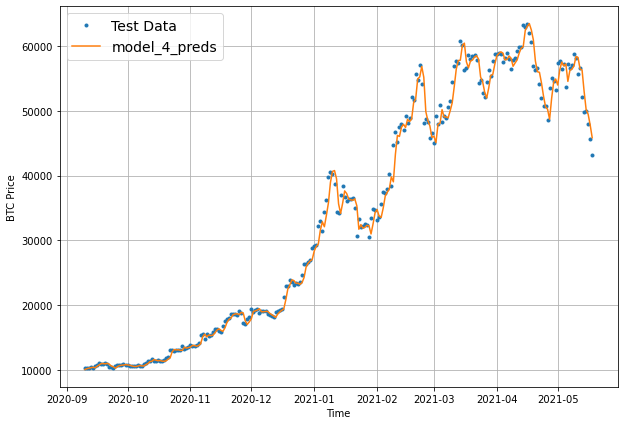

In [ ]:
offset= 300
plt.figure(figsize=(10,7))
plot_time_series(timesteps= X_test[-len(test_windows):], values=test_labels[:,0], start=offset, label='Test Data')

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_4_preds,
                 start=offset,
                 format='-',
                 label="model_4_preds")

##LSTM

In [ ]:
inputs= layers.Input(shape=(WINDOW_SIZE))
x=layers.Lambda(lambda x:tf.expand_dims(x,axis=1))(inputs)
#x=layers.LSTM(128, return_sequences=True)(x)
x=layers.LSTM(128, activation='relu')(x)
#x=layers.Dense(32, activation='tanh')(x)

output=layers.Dense(HORIZON)(x)

model_5=tf.keras.Model(inputs= inputs, outputs=output, name='model_5_LSTM')

model_5.compile(loss='mae',
                optimizer= tf.keras.optimizers.Adam())

model_5.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - 3s 103ms/step - loss: 1741.7318 - val_loss: 2566.7739
Epoch 2/100
18/18 [==============================] - 2s 111ms/step - loss: 274.3179 - val_loss: 1110.7738
Epoch 3/100
18/18 [==============================] - 2s 95ms/step - loss: 192.8030 - val_loss: 1003.7775
Epoch 4/100
18/18 [==============================] - 2s 94ms/step - loss: 177.3789 - val_loss: 972.0564
Epoch 5/100
18/18 [==============================] - 2s 92ms/step - loss: 157.1252 - val_loss: 916.8762
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 167.8733 - val_loss: 960.9933
Epoch 7/100
18/18 [==============================] - 2s 113ms/step - loss: 151.7340 - val_loss: 905.3946
Epoch 8/100
18/18 [==============================] - 2s 94ms/step - loss: 153.5887 - val_loss: 886.2776
Epoch 9/100
18/18 [==============================] - 0s 7ms/step - loss: 151.3945 - val_loss: 904.4757
Epoch 10/100
18/18 [==============================] - 0s 6m

In [ ]:
model_5.evaluate(test_windows, test_labels)

model_5=tf.keras.models.load_model('/content/model_experiments/model_5_LSTM')
model_5.evaluate(test_windows, test_labels)

model_5_preds= make_preds(model_5,
                         input_data=test_windows)
model_5_preds= np.float64(model_5_preds)

model_5_results= evaluate_preds(y_true=tf.squeeze(test_labels),
                                y_pred=model_5_preds)

18/18 [==============================] - 0s 2ms/step - loss: 665.5404


18/18 [==============================] - 0s 2ms/step


In [ ]:
model_5_results

{'mae': 586.4906909441672,
 'mse': 1229099.6709926226,
 'rmse': 1108.647676673082,
 'mape': 2.633929896434117,
 'mase': 1.023631341362789}

In [ ]:
model_1_results

{'mae': 570.3397368514985,
 'mse': 1180294.7576910225,
 'rmse': 1086.4137138728609,
 'mape': 2.539222681957394,
 'mase': 0.9954422787613826}

In [ ]:
block_reward_1=50
block_reward_2=25
block_reward_3=12.5
block_reward_4=6.25

block_reward_2_datetime=np.datetime64("2012-11-28")
block_reward_3_datetime=np.datetime64("2016-07-09")
block_reward_4_datetime=np.datetime64("2020-05-18")


In [ ]:
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


In [ ]:
block_reward_2_days= (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_2_days

1012

In [ ]:
block_reward_3_days= (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_3_days

2421

In [ ]:
bitcoin_prices_block=bitcoin_prices.copy()
bitcoin_prices_block["block_reward"]=None
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,None
2013-10-02,125.45500,None
2013-10-03,108.58483,None
2013-10-04,118.67466,None
2013-10-05,121.33866,None


In [ ]:
bitcoin_prices_block.iloc[:block_reward_2_days,-1]=block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days,-1]=block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:,-1]=block_reward_4

In [ ]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


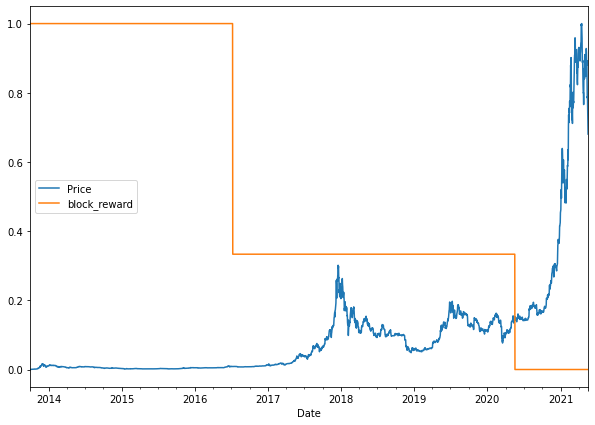

In [ ]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df=pd.DataFrame(minmax_scale(bitcoin_prices_block[['Price','block_reward']]),
                                   columns=bitcoin_prices_block.columns,
                                   index=bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize=(10,7))

In [ ]:
WINDOW_SIZE=7 
HORIZON=1

bitcoin_prices_windowed=bitcoin_prices_block.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f'Price+{i+1}']=bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2021-05-14,49764.132082,6.25,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,6.25,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,6.25,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2021-05-17,45604.615754,6.25,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426
2021-05-18,43144.471291,6.25,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651


In [ ]:
X=bitcoin_prices_windowed.dropna().drop("Price",axis=1).astype(np.float32)
y=bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)

In [ ]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(X)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = X[:split_size], y[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [ ]:
model_6=tf.keras.Sequential([
    layers.Dense(128,activation='relu'),
    layers.Dense(128,activation='relu'),
    layers.Dense(HORIZON)
    
    ], name='model_6')

model_6.compile(loss='mae',
                optimizer= tf.keras.optimizers.Adam())

model_6.fit(X_train,y_train,
            epochs=100,
            batch_size=128,
            verbose=1,
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
18/18 [==============================] - 2s 78ms/step - loss: 1168.5255 - val_loss: 1033.3315
Epoch 2/100
18/18 [==============================] - 1s 76ms/step - loss: 277.9497 - val_loss: 997.6810
Epoch 3/100
18/18 [==============================] - 0s 8ms/step - loss: 202.5635 - val_loss: 1376.8085
Epoch 4/100
18/18 [==============================] - 1s 70ms/step - loss: 175.3446 - val_loss: 899.2476
Epoch 5/100
18/18 [==============================] - 0s 13ms/step - loss: 159.0210 - val_loss: 912.1906
Epoch 6/100
18/18 [==============================] - 1s 77ms/step - loss: 148.4855 - val_loss: 777.6479
Epoch 7/100
18/18 [==============================] - 0s 8ms/step - loss: 136.0612 - val_loss: 813.5339
Epoch 8/100
18/18 [==============================] - 1s 68ms/step - loss: 130.4203 - val_loss: 677.3164
Epoch 9/100
18/18 [==============================] - 1s 74ms/step - loss: 130.2741 - val_loss: 676.1065
Epoch 10/100
18/18 [==============================] - 1s 67ms/s

In [ ]:
model_6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 590.1281


590.1281127929688

In [ ]:
model_6=tf.keras.models.load_model('/content/model_experiments/model_6')
model_6.evaluate(X_test, y_test)

model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

18/18 [==============================] - 0s 1ms/step


{'mae': 566.4636,
 'mse': 1154917.5,
 'rmse': 1074.6709,
 'mape': 2.5367773,
 'mase': nan}

In [ ]:
model_1_results


{'mae': 570.3397368514985,
 'mse': 1180294.7576910225,
 'rmse': 1086.4137138728609,
 'mape': 2.539222681957394,
 'mase': 0.9954422787613826}

In [ ]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called 
    x = inputs 
    for layer in self.hidden: # pass inputs through each hidden layer 
      x = layer(x)
    theta = self.theta_layer(x) 
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [ ]:
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE, 
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast 
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs
     

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.37671557  0.15741983  0.3968565  -0.4563736   0.6328689   0.4064658
  0.26629943]
Forecast: 0.45730680227279663


In [ ]:
HORIZON=1
WINDOW_SIZE=7

bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [ ]:
bitcoin_prices_nbeats= bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
X= bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y= bitcoin_prices_nbeats.dropna()["Price"]

split_size= int(len(X)*0.8)
X_train,y_train=X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]


In [ ]:
train_features_dataset= tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset= tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset= tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset= tf.data.Dataset.from_tensor_slices(y_test)

train_dataset= tf.data.Dataset.zip((train_features_dataset,train_labels_dataset))
test_dataset= tf.data.Dataset.zip((test_features_dataset,test_labels_dataset))

BATCH_SIZE=1024

train_dataset=train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset=test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset,test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [ ]:
N_EPOCHS= 5000
N_NEURONS=512
N_LAYERS=4
N_STACKS=30

INPUT_SIZE= WINDOW_SIZE*HORIZON
THETA_SIZE= INPUT_SIZE+HORIZON

INPUT_SIZE,THETA_SIZE

(7, 8)

In [ ]:
tensor_1= tf.range(10)+10
tensor_2= tf.range(10)

In [ ]:
tensor_1,tensor_2

(<tf.Tensor: shape=(10,), dtype=int32, numpy=array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>)

In [ ]:
%%time

tf.random.set_seed(42)

nbeats_block_layer=NBeatsBlock(input_size=INPUT_SIZE,
                               theta_size=THETA_SIZE,
                               horizon=HORIZON,
                               n_neurons=N_NEURONS,
                               n_layers=N_LAYERS,
                               name='InitialBlock')

stack_input=layers.Input(shape=(INPUT_SIZE),name="stack_input")

residuals, forecast= nbeats_block_layer(stack_input)

for i, _ in enumerate(range(N_STACKS-1)):
  backast,block_forecast=NBeatsBlock(
    input_size=INPUT_SIZE,
    theta_size=THETA_SIZE,
    horizon=HORIZON,
    n_neurons=N_NEURONS,
    n_layers=N_LAYERS,
    name=f'NBeatsBlock_{i}'
  )(residuals)

  residuals=layers.subtract([residuals,backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

model_7= tf.keras.Model(inputs=stack_input, outputs=forecast, name="model_7_NBEATS")

model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])
 


Epoch 597: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 959: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1059: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 3min 5s, sys: 6.2 s, total: 3min 12s
Wall time: 3min 32s


In [ ]:
model_7.evaluate(test_dataset)

model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]
model_7_preds= np.float64(model_7_preds)
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

1/1 [==============================] - 0s 21ms/step


{'mae': 569.293225820123,
 'mse': 1153430.7154340276,
 'rmse': 1073.978917592905,
 'mape': 2.5652383468258786,
 'mase': nan}

In [ ]:
naive_results

{'mae': 567.9802273457541,
 'mse': 1147547.1250238959,
 'rmse': 1071.2362601330744,
 'mape': 2.516524929982267,
 'mase': 0.9995699939182624}